In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [221]:
data = pd.read_csv("shooting.csv", header=None)
data.columns = data.iloc[1] #Assigning the 1st row to be the column row
data = data[1:]  # Deleting the previous column row from our 'data' dataset
data.columns

Index([      nan,      'Rk',  'Player',  'Nation',     'Pos',   'Squad',
           'Age',    'Born',     '90s',     'Gls',      'Sh',     'SoT',
          'SoT%',   'Sh/90',  'SoT/90',    'G/Sh',   'G/SoT',    'Dist',
            'FK',      'PK',   'PKatt',      'xG',    'npxG', 'npxG/Sh',
          'G-xG', 'np:G-xG', 'Matches',  'league',  'season'],
      dtype='object', name=1)

In [222]:
data.dtypes

1
NaN        object
Rk         object
Player     object
Nation     object
Pos        object
Squad      object
Age        object
Born       object
90s        object
Gls        object
Sh         object
SoT        object
SoT%       object
Sh/90      object
SoT/90     object
G/Sh       object
G/SoT      object
Dist       object
FK         object
PK         object
PKatt      object
xG         object
npxG       object
npxG/Sh    object
G-xG       object
np:G-xG    object
Matches    object
league     object
season     object
dtype: object

In [223]:
data["G/SoT"] = pd.to_numeric(data["G/SoT"], errors='coerce') #Converting the object data type of 'G/SoT' to float so that we filter out later 
# data["Dist"] = pd.to_numeric(data["Dist"], errors='coerce')
data["np:G-xG"] = pd.to_numeric(data["np:G-xG"], errors='coerce')
data["SoT%"] = pd.to_numeric(data["SoT%"], errors='coerce')

data.dtypes

1
NaN         object
Rk          object
Player      object
Nation      object
Pos         object
Squad       object
Age         object
Born        object
90s         object
Gls         object
Sh          object
SoT         object
SoT%       float64
Sh/90       object
SoT/90      object
G/Sh        object
G/SoT      float64
Dist        object
FK          object
PK          object
PKatt       object
xG          object
npxG        object
npxG/Sh     object
G-xG        object
np:G-xG    float64
Matches     object
league      object
season      object
dtype: object

In [224]:
# Creating a dataset where only the player who will definitely score a non penalty goal if their shot is on target
# are filtered out 
goal = data[data["G/SoT"] == 1]
goal = goal[["Rk", "Player", "Pos", "Squad", "G/SoT", "Dist"]]
goal

1,Rk,Player,Pos,Squad,G/SoT,Dist
12,11,Leonardo Afonso,"FW,MF",Inter Miami,1.0,15.9
24,23,Rasmus Alm,"FW,MF",St. Louis,1.0,19.4
26,25,Fernando Álvarez,DF,CF Montréal,1.0,13.2
32,31,Tomas Ángel,"FW,MF",LAFC,1.0,13.5
39,38,César Araujo,MF,Orlando City,1.0,20.6
76,75,Jon Bell,DF,Seattle,1.0,10.3
165,164,Mauricio Cuevas,"DF,FW",LA Galaxy,1.0,19.8
186,185,Christopher Donovan,"FW,MF",Philadelphia,1.0,11.6
217,216,Marco Farfan,DF,FC Dallas,1.0,18.4
251,250,Jon Gallagher,DF,Austin,1.0,17.0


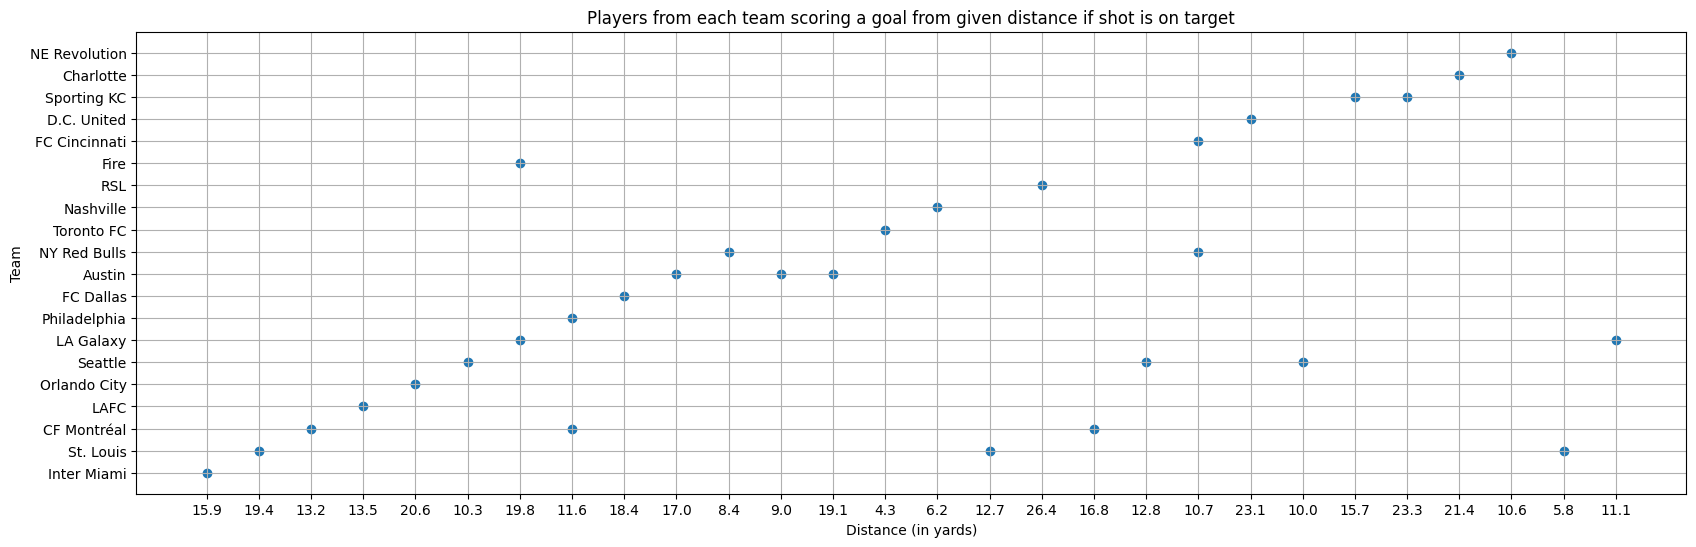

In [225]:
plt.figure(figsize=(20, 6))
scatter = plt.scatter(goal['Dist'], goal['Squad'])

plt.title('Players from each team scoring a goal from given distance if shot is on target')
plt.xlabel('Distance (in yards)')
plt.ylabel('Team')
plt.grid(True)
plt.show()



In [226]:
#Another analysis
fun = data[data["G/SoT"] == 1]
fun = fun[fun["SoT%"] >= 50]
fun = fun[["Rk", "Player", "Pos", "Squad", "G/SoT", "SoT%"]]
fun


1,Rk,Player,Pos,Squad,G/SoT,SoT%
76,75,Jon Bell,DF,Seattle,1.0,50.0
288,287,Julian Hall,"FW,MF",NY Red Bulls,1.0,50.0
369,368,Richie Laryea,DF,Toronto FC,1.0,100.0
664,663,Dylan Teves,"MF,FW",Seattle,1.0,100.0
730,729,Joshua Yaro,DF,St. Louis,1.0,50.0
738,737,Eriq Zavaleta,DF,LA Galaxy,1.0,50.0


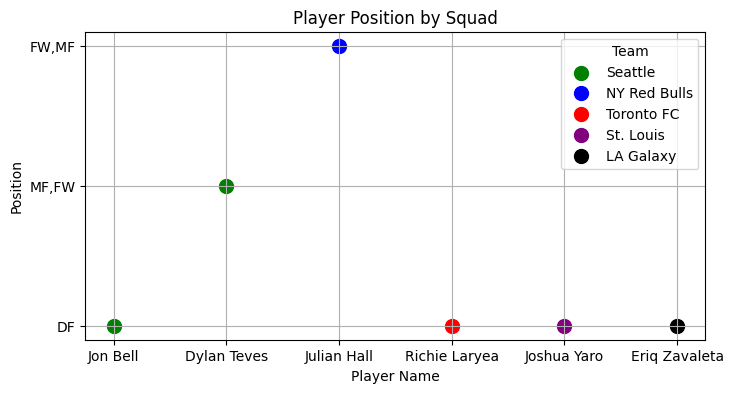

In [227]:
colors = {'Toronto FC': 'red', 'Seattle': 'green', 'NY Red Bulls': 'blue', 'St. Louis': 'purple', 'LA Galaxy': 'black'}
plt.figure(figsize=(8, 4))

for squad in fun['Squad'].unique():
    squad_data = fun[fun['Squad'] == squad]
    plt.scatter(squad_data['Player'], squad_data['Pos'], color=[colors[squad]], label=squad, s=100)

plt.title('Player Position by Squad')
plt.xlabel('Player Name')
plt.ylabel('Position')
plt.legend(title='Team')
plt.grid(True)
plt.show()
